# Python Project using CNN to train the Digit recognizer
## EE 551 Guang Yang

## Import & Load data

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler #for annealer

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

train = pd.read_csv('./digit-recognizer/train.csv')
test = pd.read_csv('./digit-recognizer/test.csv')

Using TensorFlow backend.


In [2]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train & Test Data

In [4]:
y_train = train.pop('label')
x_train = train.values
x_test = test.values

In [5]:
print("x_train: ", x_train)
print("y_train: ", y_train)
print("x_test: ",  x_test)

x_train:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
y_train:  0        1
1        0
2        1
3        4
4        0
5        0
6        7
7        3
8        5
9        3
10       8
11       9
12       1
13       3
14       3
15       1
16       2
17       0
18       7
19       5
20       8
21       6
22       2
23       0
24       2
25       3
26       6
27       9
28       9
29       7
        ..
41970    2
41971    3
41972    4
41973    4
41974    3
41975    9
41976    2
41977    4
41978    4
41979    4
41980    7
41981    2
41982    8
41983    7
41984    3
41985    3
41986    0
41987    5
41988    0
41989    5
41990    3
41991    1
41992    9
41993    6
41994    4
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64
x_test:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


count       784
unique        1
top       False
freq        784
dtype: object
count       784
unique        1
top       False
freq        784
dtype: object


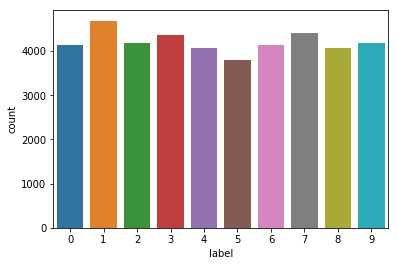

In [6]:
print(train.isnull().any().describe())
print(test.isnull().any().describe())

#check the distribution of training labels
sns.countplot(y_train)

## Reshape for showing images & Visulazie the i-th training data

(42000, 784)


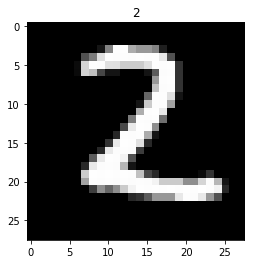

In [7]:
#reshape for showing images
print(train.shape)
img_X = [x_train[i].reshape((28,28)) for i in range(train.shape[0]) ] #reshape for visualization

#Visulaize the ith training data
i=101
plt.figure()
plt.imshow(img_X[i],cmap='gray')
plt.title(y_train[i]);

## One-Hot Encoding for labels

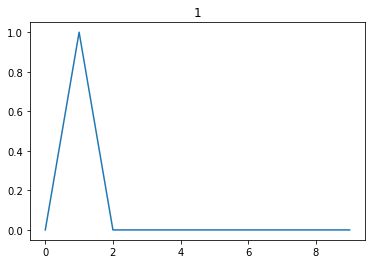

In [8]:
from keras.utils.np_utils import to_categorical
# encode lebels to one hot vector
Y_train = to_categorical(y_train,num_classes=10);
plt.plot(Y_train[0])
plt.title(y_train.iloc[0]);

## Split Training and Validation

In [9]:
#split the train and validation sets
X_train, x_val, Y_train, y_val = train_test_split(x_train,y_train, test_size =.2, random_state = 1)

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_x_train = scaler.transform(X_train)
scaled_x_train = scaled_x_train.reshape(-1,28,28,1)

scaled_x_val = scaler.transform(x_val)
scaled_x_val = scaled_x_val.reshape(-1,28,28,1)

C:\Users\yangg\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## CNN

**Define A Model**

In [11]:
#build the keras CNN model
model =Sequential([
#     Dense(16,activation='relu',input_shape = (28,28,1)),
    
    Conv2D(filters = 64, activation = 'relu',kernel_size=(5,5),padding='Same',input_shape = (28,28,1)),
    Conv2D(filters = 64, activation = 'relu',kernel_size=(5,5),padding='Same'),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Dropout(0.25),
    
    Conv2D(filters = 64, activation = 'relu',kernel_size=(3,3),padding='Same'),
    Conv2D(filters = 64, activation = 'relu',kernel_size=(3,3),padding='Same'),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(256, activation='relu'),
#     BatchNormalization(axis=1),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     BatchNormalization(axis=1),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])    


#compile the model
optimizer = RMSprop(lr=0.001)

model.compile(optimizer = optimizer,
              loss= 'sparse_categorical_crossentropy',
              metrics = ['acc']
             )

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)    

**Learning Rate annealer**

In [12]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

model.save_weights('model_init.h5')

In [13]:
print(len(Y_train))

33600


In [14]:
#train the model
EPOCHS = 15;
batch_size = 30;

history = model.fit(scaled_x_train.reshape(-1,28,28,1), Y_train,
                    batch_size=batch_size,
                    epochs=EPOCHS,
                    validation_data = (scaled_x_val.reshape(-1,28,28,1),y_val),
                    verbose=2,
                    callbacks = [learning_rate_reduction]
                   )

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/15
 - 12s - loss: 0.2247 - acc: 0.9323 - val_loss: 0.0569 - val_acc: 0.9844
Epoch 2/15
 - 10s - loss: 0.0890 - acc: 0.9756 - val_loss: 0.0477 - val_acc: 0.9854
Epoch 3/15
 - 9s - loss: 0.0803 - acc: 0.9791 - val_loss: 0.0497 - val_acc: 0.9862
Epoch 4/15
 - 10s - loss: 0.0788 - acc: 0.9796 - val_loss: 0.0518 - val_acc: 0.9865
Epoch 5/15
 - 10s - loss: 0.0851 - acc: 0.9803 - val_loss: 0.0674 - val_acc: 0.9885
Epoch 6/15
 - 9s - loss: 0.0882 - acc: 0.9814 - val_loss: 0.0644 - val_acc: 0.9858
Epoch 7/15
 - 9s - loss: 0.0969 - acc: 0.9807 - val_loss: 0.0554 - val_acc: 0.9874
Epoch 8/15
 - 9s - loss: 0.1063 - acc: 0.9799 - val_loss: 0.0592 - val_acc: 0.9876

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 9/15
 - 9s - loss: 0.0630 - acc: 0.9862 - val_loss: 0.0574 - val_acc: 0.9899
Epoch 10/15
 - 9s - loss: 0.0564 - acc: 0.9880 - val_loss: 0.0666 - val

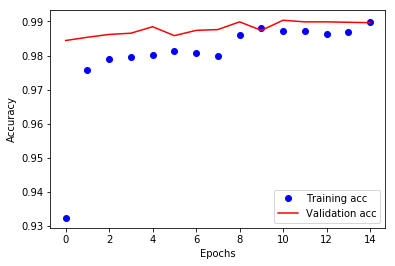

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

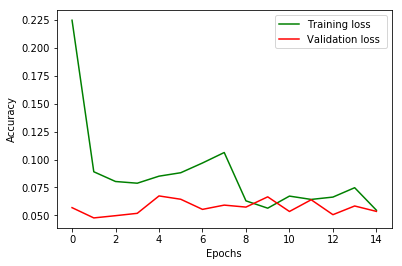

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Train (again) and evaluate the model

- Fix hyper-parameters and train the network on the entire training set
- Evaluate the model on the test set.

In [17]:
# Re-scale the x_train (entire training dataset)
scaler = StandardScaler()
scaler.fit(x_train)
SC_x_train = scaler.transform(x_train)
SC_x_train = SC_x_train.reshape(-1,28,28,1)

history = model.fit(SC_x_train.reshape(-1,28,28,1), y_train,
                    batch_size=30,
                    epochs=15,
                    verbose=2,
                    callbacks = [learning_rate_reduction]
                   )

Epoch 1/15
 - 11s - loss: 0.0576 - acc: 0.9884
Epoch 2/15


c:\users\yangg\appdata\local\programs\python\python36\lib\site-packages\keras\callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 11s - loss: 0.0653 - acc: 0.9880
Epoch 3/15
 - 11s - loss: 0.0626 - acc: 0.9884
Epoch 4/15
 - 11s - loss: 0.0586 - acc: 0.9887
Epoch 5/15
 - 11s - loss: 0.0645 - acc: 0.9885
Epoch 6/15
 - 11s - loss: 0.0684 - acc: 0.9875
Epoch 7/15
 - 11s - loss: 0.0666 - acc: 0.9879
Epoch 8/15
 - 11s - loss: 0.0748 - acc: 0.9871
Epoch 9/15
 - 11s - loss: 0.0713 - acc: 0.9869
Epoch 10/15
 - 11s - loss: 0.0739 - acc: 0.9874
Epoch 11/15
 - 11s - loss: 0.0880 - acc: 0.9853
Epoch 12/15
 - 11s - loss: 0.0829 - acc: 0.9860
Epoch 13/15
 - 11s - loss: 0.0893 - acc: 0.9847
Epoch 14/15
 - 11s - loss: 0.0954 - acc: 0.9849
Epoch 15/15
 - 12s - loss: 0.0899 - acc: 0.9860


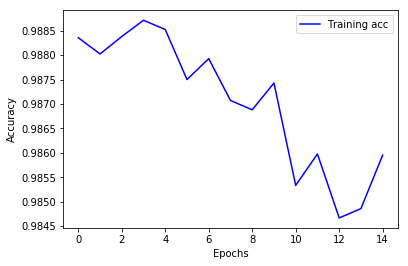

In [18]:
acc = history.history['acc']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()